## Introducción

<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
         </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Estadistica descriptiva del conjunto de Datos</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>CICLO: M3A</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Verónica Chimbo <span style="margin-left: 30px;"></span></div>
        </div>
        <div style="text-align:right;">Carrera: TECNOLOGÍA SUPERIOR EN BIG DATA <span style="margin-left: 30px;"></span></div>
         <div style="text-align:right;">Estudiante: Paul Rodriguez  <span style="margin-left: 30px;"></span></div>
          <div style="text-align:right;">Fecha::  <span style="margin-left: 30px;"></span></div>
        </div>
    </div>
</div>
<!--/Header-->

El precio de venta de las viviendas depende de muchos factores, como la superfície construida, el número de habitaciones o la situación en que se encuentra. El conjunto de datos que usaremos en esta actividad corresponden al _dataset_ [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) que es una de las competiciones de iniciación de [Kaggle](www.kaggle.com). Contiene 79 variables con información de casi cada aspecto de las casas residenciales en la ciudad de Ames, Iowa.

Nuestro interés en esta actividad será aplicar métodos de estadística descriptiva y visualización de datos para ver qué variables están más relacionadas entre ellas y, en especial, con el precio de venta de una propiedad.
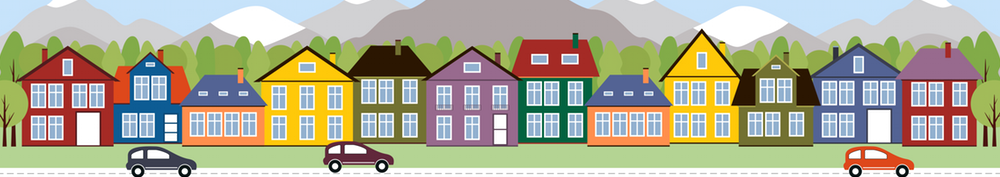

[DESCARGA DEL DATASET](https://drive.google.com/file/d/1zgvTvDeb-NcMm4gPjAu8nf7gzxRwCQuU/view?usp=share_link)

## Lectura y descripción del conjunto de datos

Lo primero que haremos, como siempre, será leer los datos y darles un vistazo.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
df_hotel = pd.read_csv('/content/drive/MyDrive/Actividad 5/data/gadcuenca_hosteleria_2022septiembre.csv', encoding='latin1')
df_hotel.head()

,tipo,nombre,direccion,telefono,nro_habitaciones,responsable,nro_plazas,categoria,servicios,web,email
0,Hotel,Americano,Francisco Tamariz 114 y Av. Heroes de Verdeloma,5937-2837882,12,ND,18,Segunda,Cafeteria parqueo lavanderia asesoria turistica,www.hotelamericanocuenca.com,hotelamericanocuenca@gmail.com
1,Hotel,Atahualpa,M Sucre 3-50 y Tomas Ordonez,5937-2842345,24,ND,49,Segunda,Restaurante TV por cable e internet inalambric...,www.ubicacuenca.com info hotelatahualpa,hotelatahualpa@hotmail.com
2,Hotel,Casa de Lidice,General Torres 11-69 entre Gaspar Sangurima y ...,5937-2825698,10,ND,25,ND,Wi-Fi bano privado (agua caliente) TV por cabl...,www.casadelidice.com,casadelidice@gmail.com
3,Hotel,Cuatro Mundos,Benigno Malo 10-70 entre Mariscal Lamar y Gran...,5937-2837058,20,ND,100,Segunda,Restaurante salon de eventos y negocios habita...,ND,hotelcuatromundos@hotmail.com
4,Hotel,Cuenca Suites Apart-hotel,Simon Bolivar 14-65 y Coronel Talbot,5937-2848138,12,ND,30,Segunda,Limpieza diaria parqueadero propio cafeteria T...,www.cuencasuites.com,info@cuencasuites.com


Vemos que tenemos 81 columnas, la primera de las cuales es un identificador correlativo que no tiene valor informativo; y la última es el precio de venta.

In [16]:
df_hotel.columns

Index(['tipo', 'nombre', 'direccion', 'telefono', 'nro_habitaciones',
       'responsable', 'nro_plazas', 'categoria', 'servicios', 'web', 'email'],
      dtype='object')

## Diccionario de variables

A continuación adjuntamos el diccionario de variables con la explicación de que indica cada una y el rango de valores que tiene en caso de ser categórica.

### Valores no disponibles

Com vimos en la actividad de limpieza del conjunto de datos, miraremos qué variables tienen una cantidad alta de valores no disponibles.

In [17]:
total = df_hotel.isnull().sum().sort_values(ascending=False)
percent = (df_hotel.isnull().sum()/df_hotel.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]

,Total,Percent


Eliminaremos aquellas variables con más del 15% de valores no disponibles, ya que pueden causar ruido en el análisis del conjunto de datos.

In [18]:
df_hotel  = df_hotel[missing_data[missing_data['Percent'] < 0.05].index]


In [19]:
df_hotel.head()

,tipo,nombre,direccion,telefono,nro_habitaciones,responsable,nro_plazas,categoria,servicios,web,email
0,Hotel,Americano,Francisco Tamariz 114 y Av. Heroes de Verdeloma,5937-2837882,12,ND,18,Segunda,Cafeteria parqueo lavanderia asesoria turistica,www.hotelamericanocuenca.com,hotelamericanocuenca@gmail.com
1,Hotel,Atahualpa,M Sucre 3-50 y Tomas Ordonez,5937-2842345,24,ND,49,Segunda,Restaurante TV por cable e internet inalambric...,www.ubicacuenca.com info hotelatahualpa,hotelatahualpa@hotmail.com
2,Hotel,Casa de Lidice,General Torres 11-69 entre Gaspar Sangurima y ...,5937-2825698,10,ND,25,ND,Wi-Fi bano privado (agua caliente) TV por cabl...,www.casadelidice.com,casadelidice@gmail.com
3,Hotel,Cuatro Mundos,Benigno Malo 10-70 entre Mariscal Lamar y Gran...,5937-2837058,20,ND,100,Segunda,Restaurante salon de eventos y negocios habita...,ND,hotelcuatromundos@hotmail.com
4,Hotel,Cuenca Suites Apart-hotel,Simon Bolivar 14-65 y Coronel Talbot,5937-2848138,12,ND,30,Segunda,Limpieza diaria parqueadero propio cafeteria T...,www.cuencasuites.com,info@cuencasuites.com


## Análisis univariante

El análisis univariante es la forma más sencilla de analizar datos. Se trata simplemente de considerar cada variable por separado, sumarizarla y analizar su distribución de valores.

Dentro del análisis univariante, separaremos variables numéricas y categóricas. Para las variables numéricas calcularemos el número de valores disponibles, la media, la desviación estándard, el mínimo, el máximo y los cuartiles, y analizaremos su distribución. En las variables categóriques veremos la distribución del sus valores en un histograma.

In [20]:
print(df_hotel.dtypes)

tipo                object
nombre              object
direccion           object
telefono            object
nro_habitaciones    object
responsable         object
nro_plazas          object
categoria           object
servicios           object
web                 object
email               object
dtype: object


tipo                 object
nombre               object
direccion            object
telefono             object
nro_habitaciones    float64
responsable          object
nro_plazas          float64
categoria            object
servicios            object
web                  object
email                object
dtype: object


array([[<Axes: title={'center': 'nro_habitaciones'}>,
        <Axes: title={'center': 'nro_plazas'}>]], dtype=object)

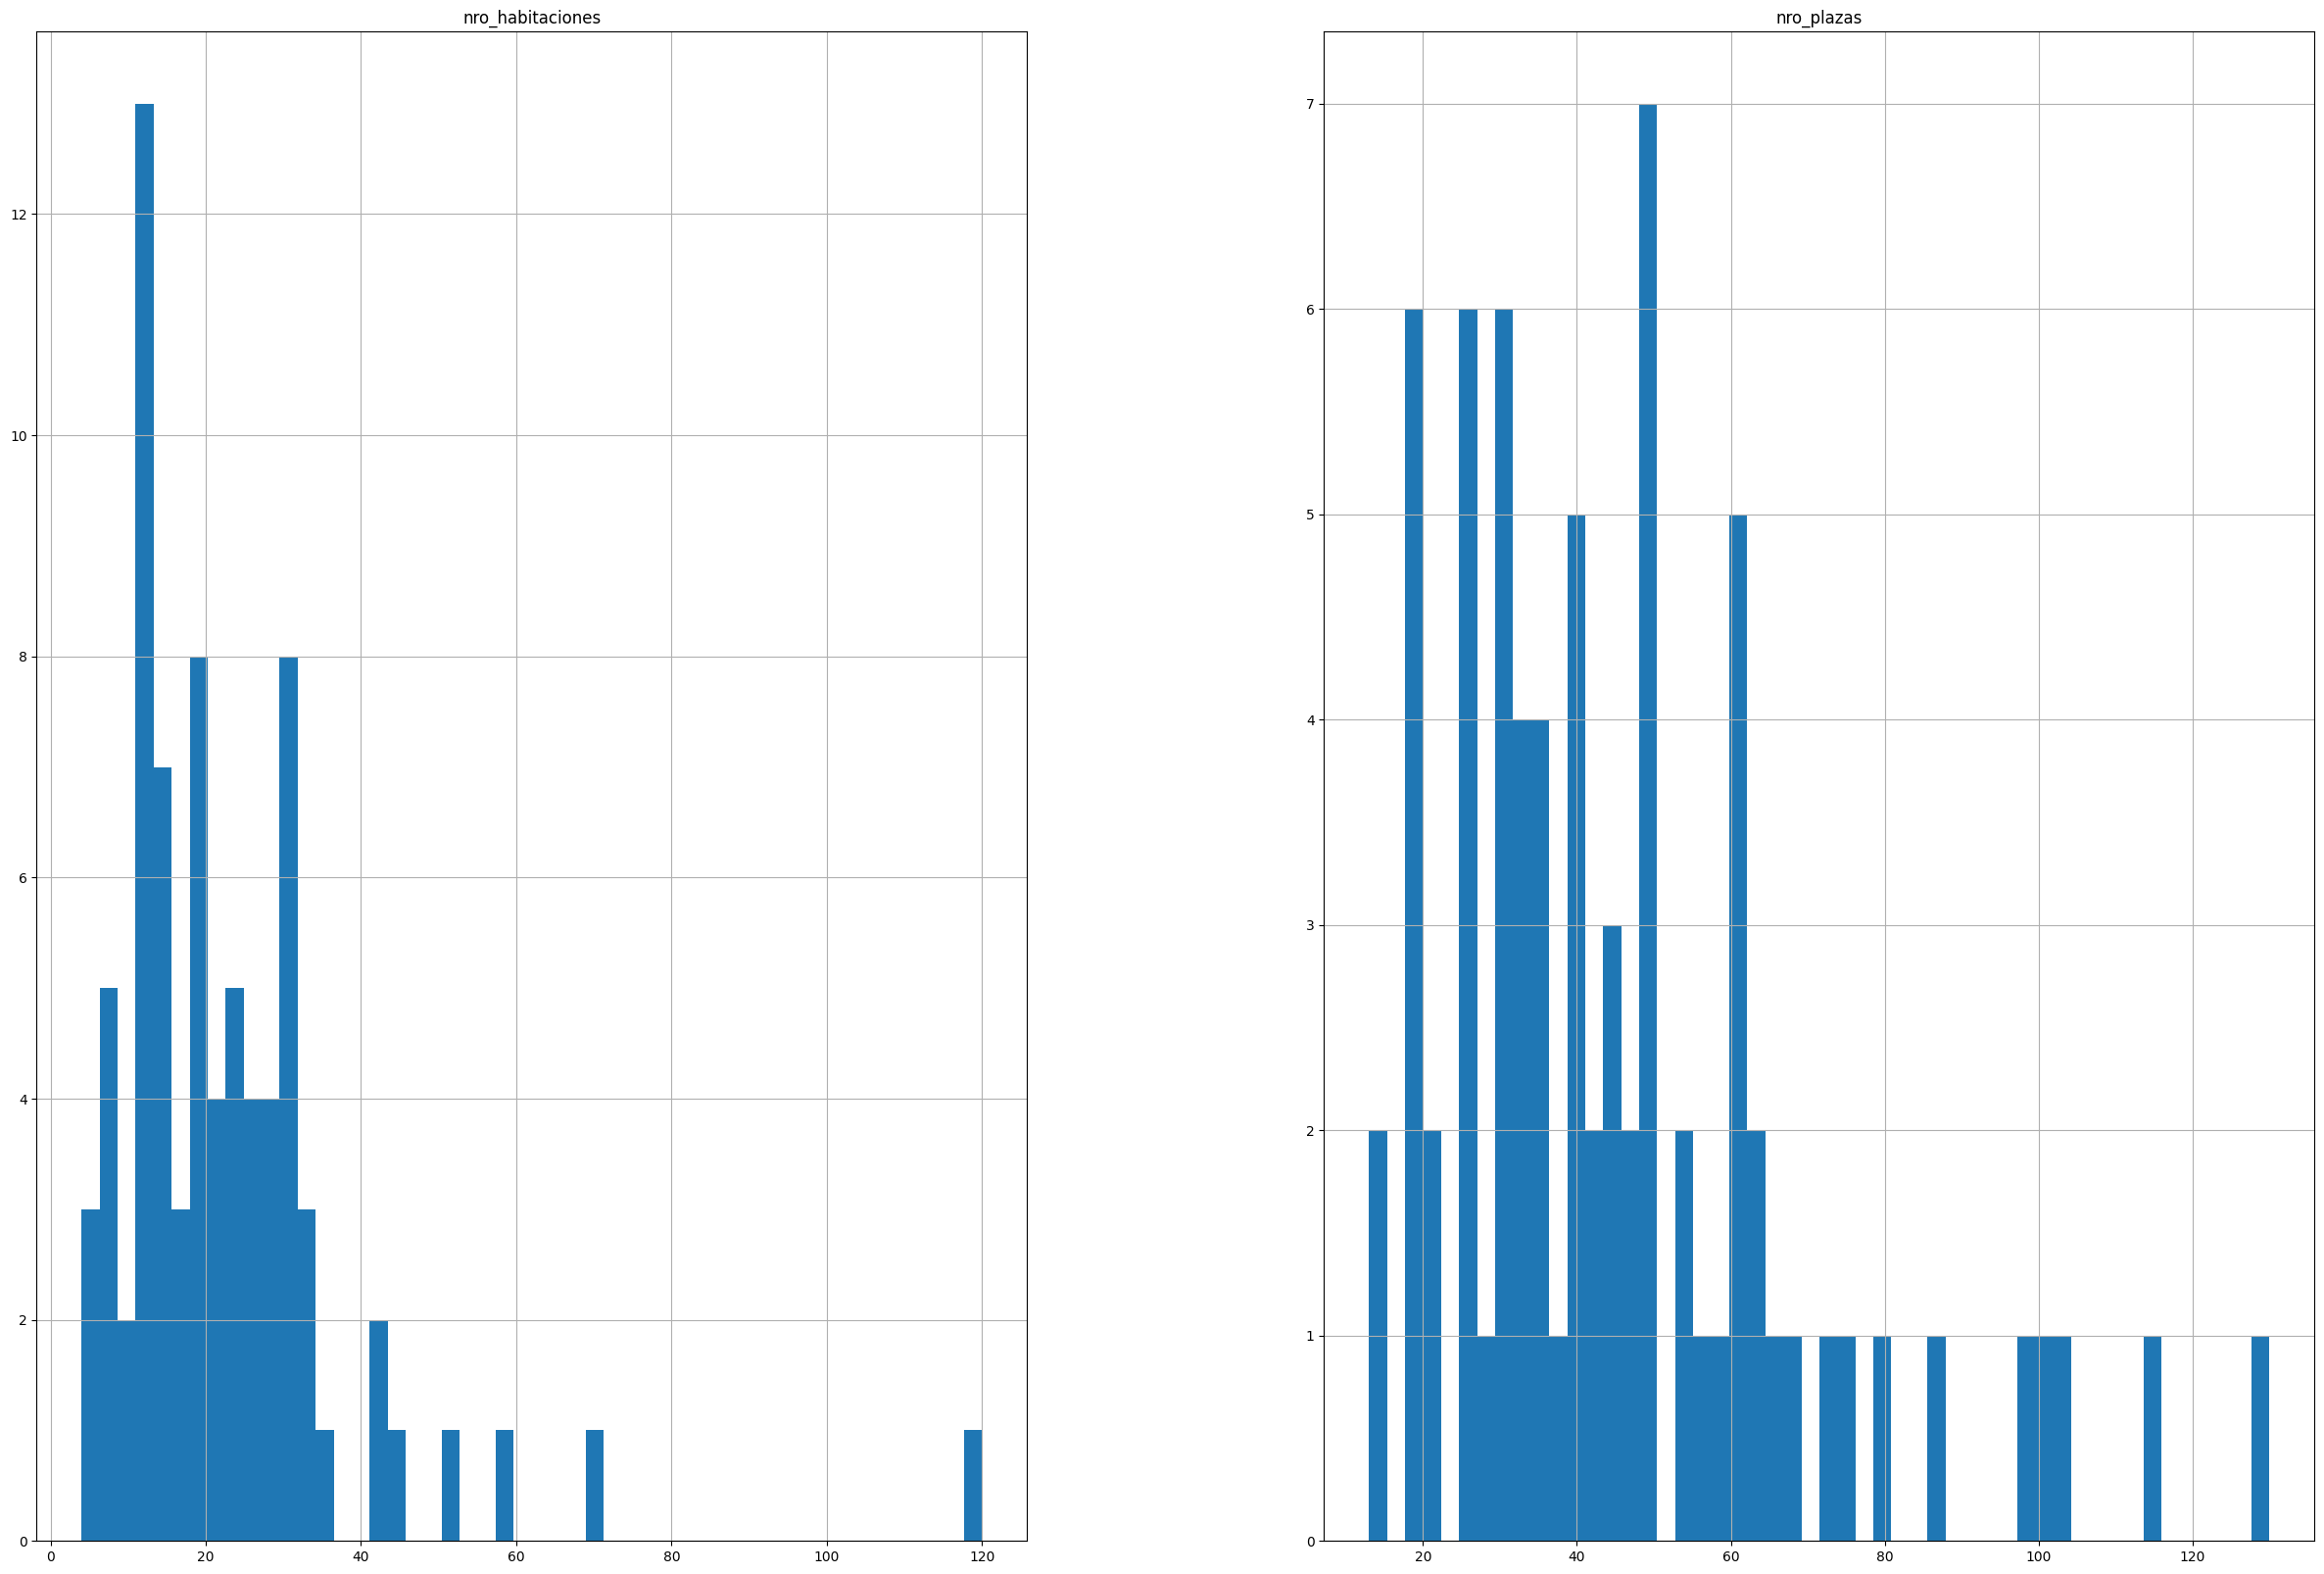

In [21]:
# Convertir las columnas a tipo numérico
df_hotel['nro_habitaciones'] = pd.to_numeric(df_hotel['nro_habitaciones'], errors='coerce')
df_hotel['nro_plazas'] = pd.to_numeric(df_hotel['nro_plazas'], errors='coerce')

# Verificar los tipos de datos después de la conversión
print(df_hotel.dtypes)

# Crear histogramas para las columnas numéricas
numerical_columns = df_hotel.select_dtypes(include=['number'])
numerical_columns.hist(bins=50, figsize=(30,20))

### Variables numéricas

La función `describe` nos permite hacer una descriptiva rápida de las variables de tipo numérico. En concreto, nos muestra la media, la desviación estándard, el mínimo, el màximo y los cuartiles de las variables.

In [22]:
df_hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
nro_habitaciones,77.0,22.818182,16.511342,4.0,13.0,20.0,29.0,120.0
nro_plazas,73.0,46.095890,23.942735,13.0,30.0,41.0,58.0,130.0


Cada uno de estos cálculos estadísticos se pueden hacer individualmente, para todo el conjunto de datos. Las funciones disponibles en la librería `Pandas` son `count`, `mean`, `std`, `min`, `max` i `quantile`.

In [25]:
numerical_columns.quantile(0.25)

nro_habitaciones    13.0
nro_plazas          30.0
Name: 0.25, dtype: float64

O bién para una sola variable.

In [28]:
df_hotel['nro_habitaciones'].mean()

22.818181818181817

#### Variable dependiente

Dentro de las variables numéricas prestaremos atención a la variable dependiente del análisis: el precio de venta.

In [47]:
df_hotel['nro_plazas'].describe()

count    73.000000
mean      3.735465
std       0.486666
min       2.639057
25%       3.433987
50%       3.737670
75%       4.077537
max       4.875197
Name: nro_plazas, dtype: float64

#### Distribución de la variable e histograma

Podemos visualizar su distribución de la variable con un histograma.

<Axes: >

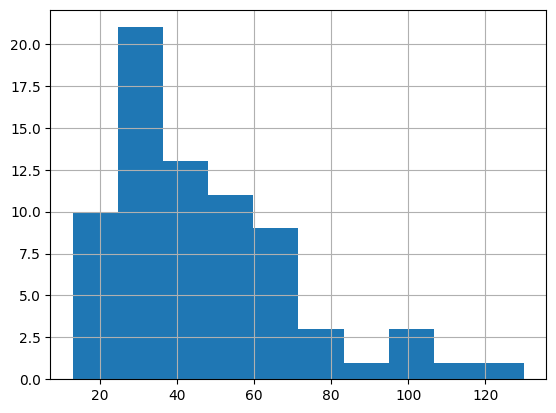

In [33]:
df_hotel['nro_plazas'].hist()

#### Test de normalidad

Si observamos los valores mínimo, medio y máximo vemos claramente que no es una variable con distribución normal. En la mayoría de modelos numéricos de aprendizaje automático, necesitaremos que las variables sigan la distribución normal.

Con la función `distplot` de la librería de visualización `Seaborn` podemos comparar la distribución de nuestra variable con la normal.

<ipython-input-34-8e48ff6f13db>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hotel['nro_plazas'], fit = norm)


<Axes: xlabel='nro_plazas', ylabel='Density'>

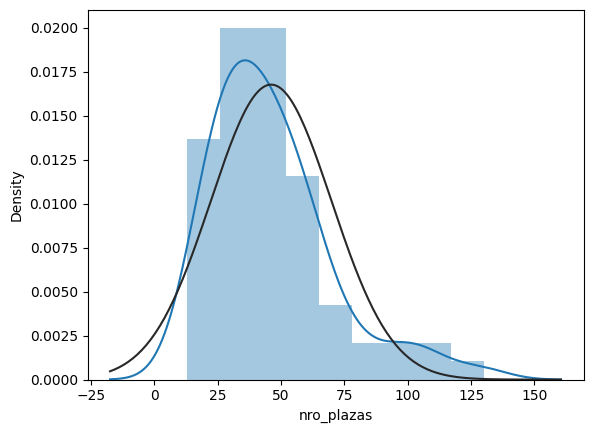

In [34]:
from scipy.stats import norm
sns.distplot(df_hotel['nro_plazas'], fit = norm)

De una forma numérica pero menos visual podemos calcular dos indicadores de normalidad. La asimetría de la función o _skewness_ y el _kurtosis_.

La función `skew` calcula el coeficiente de asimetría. Si es positivo y mayor que uno, como en nuestro caso, los valores de la distribución són más densos hacia la izquierda del gráfico. En una distribución normal, el coeficiente de asimetría sería cercano a cero.

In [36]:
df_hotel['nro_plazas'].skew()

1.317853657970205

La función `kurtosis` nos da una idea de la relación del pico central con los extremos de la campana de la distribución. Si es cercano a 1, el valor será coherente con la normalidad de la variable. En nuestro caso, se encuentra bastante lejos.

In [37]:
df_hotel['nro_plazas'].kurt()

1.9952216821755862

Cuando nos encontramos una variable que no es normal, una de las transformaciones clásicas que puede funcionar es aplicar el logaritmo a la variable.

<ipython-input-38-c9122ea74b63>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hotel['nro_plazas'], fit = norm)


<Axes: xlabel='nro_plazas', ylabel='Density'>

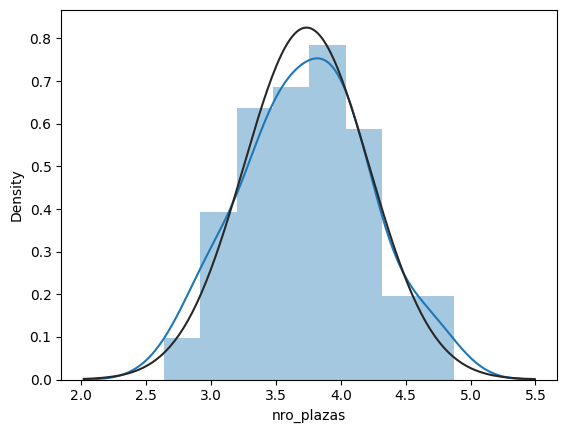

In [38]:
df_hotel['nro_plazas'] = np.log1p(df_hotel['nro_plazas'])
sns.distplot(df_hotel['nro_plazas'], fit = norm)

Vemos como ahora sí que tiene forma normal. Lo comprobamos con los métodos estadísticos para confirmarlo.

In [40]:
df_hotel['nro_plazas'].skew()

0.037169248363830544

In [41]:
df_hotel['nro_plazas'].kurt()

-0.28107733820038394

### Variables categóricas

El otro tipo de variables que tenemos son las variables categóricas. Analizaremos la variable que identifica la calificación del habitaje.

<Axes: xlabel='tipo'>

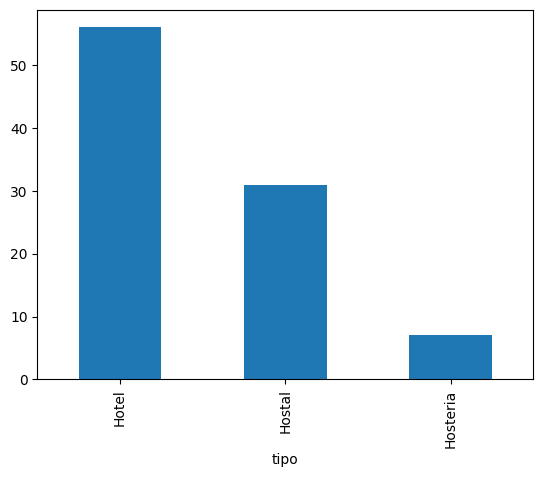

In [45]:
df_hotel['tipo'].value_counts().plot(kind='bar')

## Análisis bivariante

Para analizar un conjunto de datos debemos tener en cuenta más de una variable a la vez. El análisis bivariante permite identificar las relaciones entre dos variables, y hasta ver de qué forma una puede predecir la otra.

En este caso podem ver cuál es la relación entre el precio de venta y la superfície construida con un _scatter plot_ o diagrama de puntos.

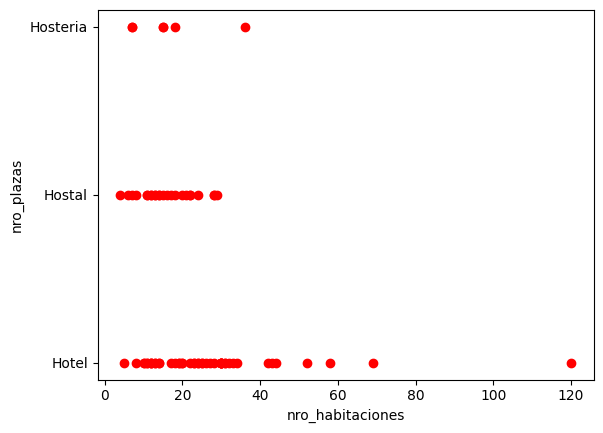

In [48]:
var = 'nro_habitaciones'
data = pd.concat([df_hotel['nro_plazas'],df_hotel['tipo'], df_hotel[var]], axis=1)
data.plot.scatter(x=var, y='nro_plazas',c=
                  "red")
x= data[var]
y1=df_hotel['nro_plazas']
y2=df_hotel['tipo']
# Plot
plt.scatter(x,y1,color='blue')
plt.scatter(x,y2,color= 'red')

# Decorate
plt.show()


En el caso de una variable categórica como la calificación, podemos visualizar la relación con un _boxplot_ o diagrama de cajas.

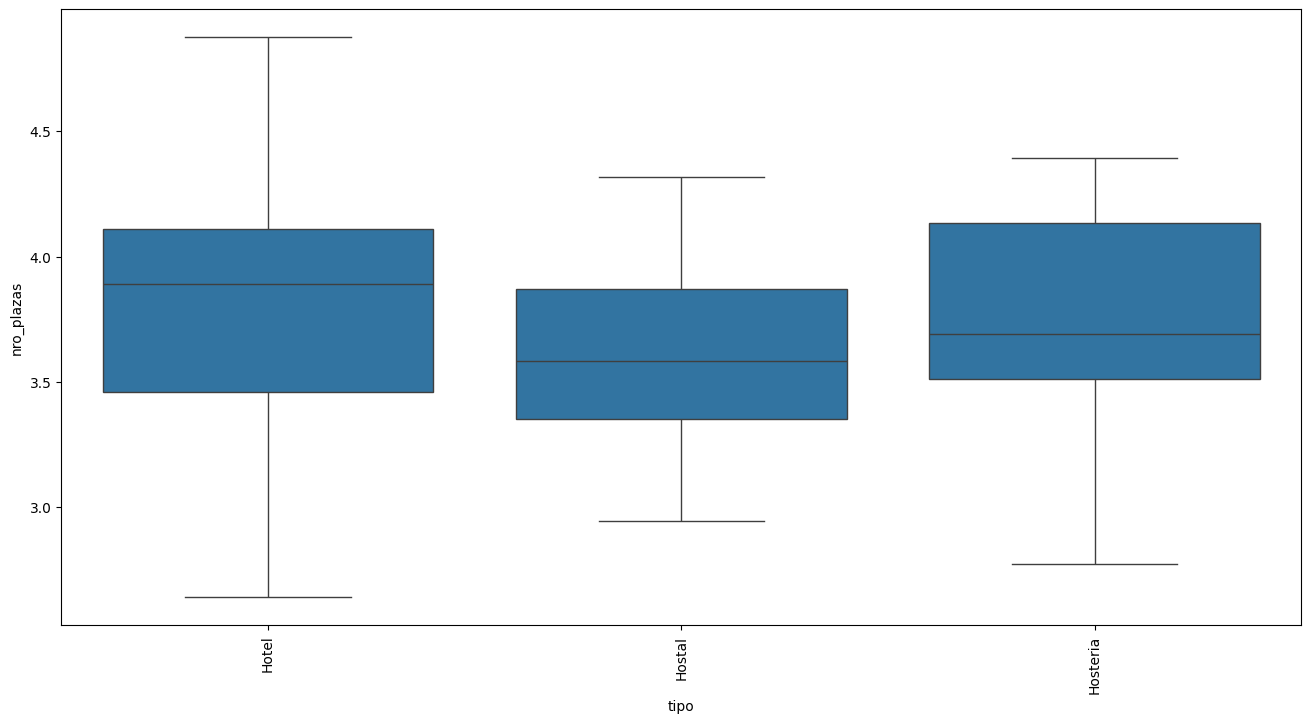

In [49]:
var = 'tipo'
data = pd.concat([df_hotel['nro_plazas'], df_hotel[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="nro_plazas", data=data)
plt.xticks(rotation=90);

Si queremos visualizar a la vez las relaciones cruzadas entre varias variables, podemos hacer un _pairplot_.

In [51]:
list(df_hotel.columns)

['tipo',
 'nombre',
 'direccion',
 'telefono',
 'nro_habitaciones',
 'responsable',
 'nro_plazas',
 'categoria',
 'servicios',
 'web',
 'email']

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


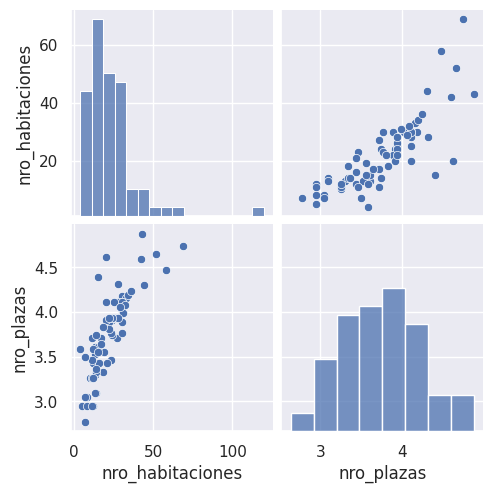

In [52]:
sns.set()
cols = ['tipo','nombre','nro_habitaciones','responsable','nro_plazas','categoria','servicios']
sns.pairplot(df_hotel[cols], size = 2.5)
plt.show();

## Análisis multivariante

Finalmente, nos interessará ver qué conjuntos de variables estan relacionadas entre sí. Para ello, usaremos técnicas estadísticas de análisis multivariante.

Una de las herramientas más útiles es calcular la matriz de correlación entre las variables. Con la función `heatmap` podemos visualizar de manera sencilla aquellas variables más correlacionadas, que corresponden a una intensidad mayor de color.

<Axes: >

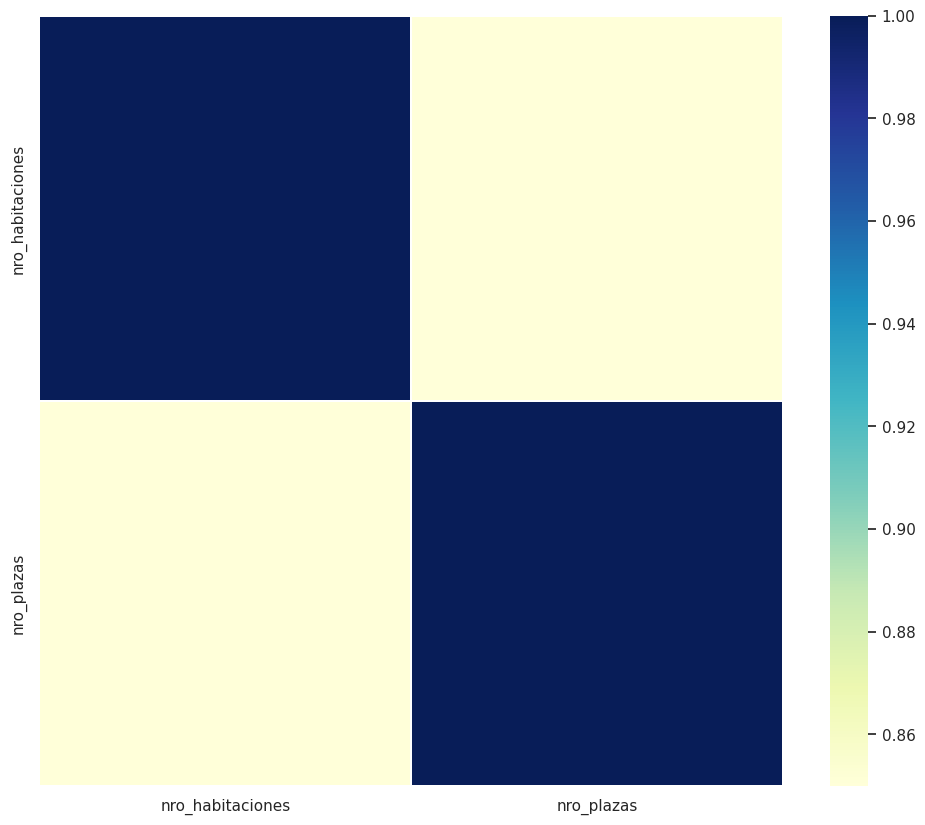

In [56]:
corrmat = numerical_columns.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

El `clustermap` nos permite ir un paso más allá y agrupar las variables que tienen más relación entre ellas, a partir de un algoritmo de _clustering_ a partir de la información de la correlación. Esto nos servirá eventualmente, para evitar escojer datos muy correlacionados que nos puedan perjudicar en el momento de aplicar un modelo.

Vemos, por ejemplo, que las variables `YearBuilt`, `GarageYrBlt` y `YearRemodAdd` están muy correlacionadas y nos dan casi la misma informacion. En la fase de modelado, escogeremos sólo una de las tres.

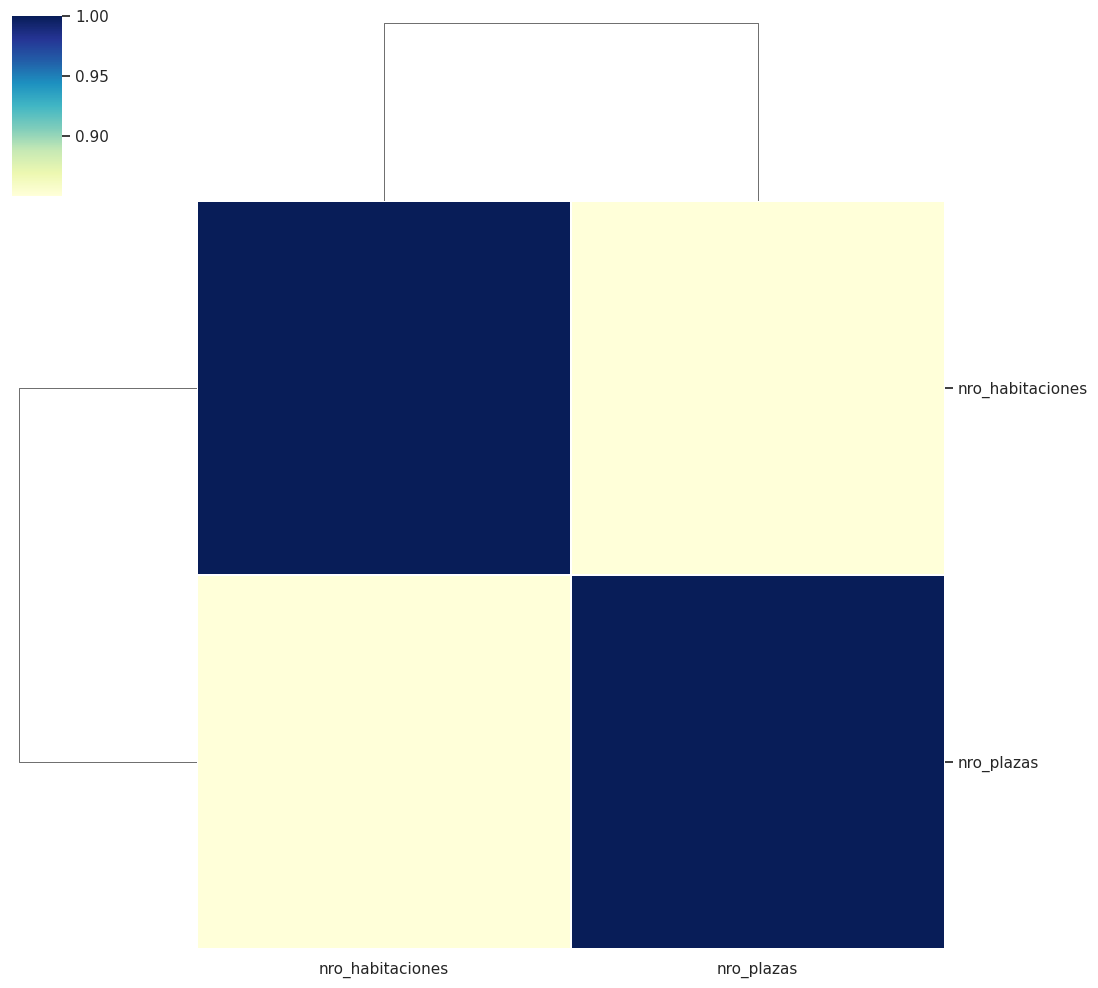

In [57]:
corrmat = numerical_columns.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

Finalmente, escogeremos las 15 variables más correlacionadas con el precio de venta del habitaje, y mostraremos la correlación.

tipo                 object
nombre               object
direccion            object
telefono             object
nro_habitaciones    float64
responsable          object
nro_plazas          float64
categoria            object
servicios            object
web                  object
email                object
dtype: object
                  nro_habitaciones  nro_plazas
nro_habitaciones          1.000000    0.850042
nro_plazas                0.850042    1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


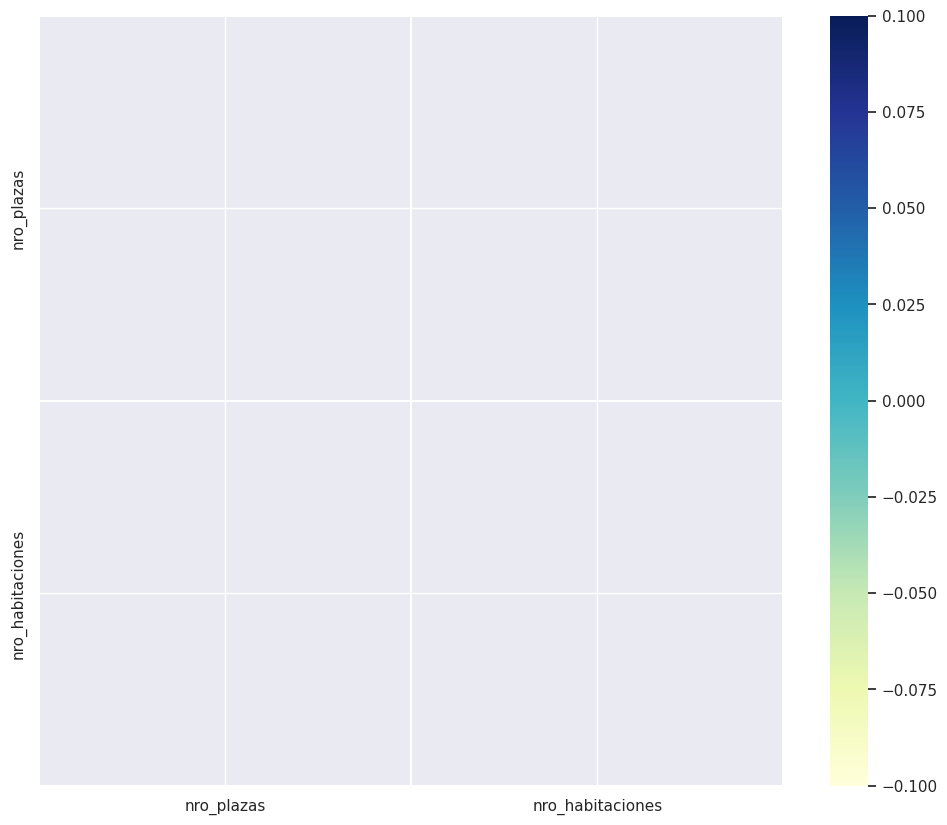

In [61]:
# Convertir las columnas a tipo numérico
df_hotel['nro_habitaciones'] = pd.to_numeric(df_hotel['nro_habitaciones'], errors='coerce')
df_hotel['nro_plazas'] = pd.to_numeric(df_hotel['nro_plazas'], errors='coerce')

# Verificar los tipos de datos después de la conversión
print(df_hotel.dtypes)

# Seleccionar solo las columnas numéricas
numerical_columns = df_hotel.select_dtypes(include=['number'])

# Calcular la matriz de correlación usando el método de Spearman
corrmat = numerical_columns.corr(method='spearman')

# Verificar la matriz de correlación
print(corrmat)

# Seleccionar las k variables más correlacionadas con 'nro_plazas'
k = 15
cols = corrmat.nlargest(k, 'nro_plazas')['nro_plazas'].index

# Calcular la matriz de correlación para las columnas seleccionadas
cm = np.corrcoef(numerical_columns[cols].values.T)

# Crear el heatmap
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

# Mostrar el heatmap
plt.show()